In [9]:
import sys, os, importlib.util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from scipy.constants import lambda2nu, nu2lambda, c
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [10]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [12]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

fdtdApi = lumapi.FDTD(hide = False)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


Units

In [13]:
um = 1e-6
nm = 1e-9
valor_lambda_1550 = 1550

Material and dimentions of the Waveguide

In [14]:
sub_material = 'SiO2 (Glass) - Palik'

gap = 200*nm

x_span_waveguide_acopla = 12.2208*um
y_span_waveguide = 0.450*um
z_span_waveguide = 0.22*um
x_waveguide = 0.0*um
y_waveguide = ((gap+y_span_waveguide)/2)
z_waveguide = 0.0*um
waveguide_material = 'Si (Silicon) - Palik'
radiu = 10*um

Creat Waveguide

In [15]:
fdtdApi.switchtolayout()

fdtdApi.deleteall()

fdtdApi.addrect()
fdtdApi.set('name', 'waveguide_topper')
fdtdApi.set('material', waveguide_material)
fdtdApi.set('x', x_waveguide)
fdtdApi.set('y', -y_waveguide)
fdtdApi.set('z', z_waveguide)
fdtdApi.set('x span', x_span_waveguide_acopla + radiu*2 + 5*um)
fdtdApi.set('y span', y_span_waveguide)
fdtdApi.set('z span', z_span_waveguide)

fdtdApi.copy()
fdtdApi.set('name', 'waveguide_upper')
fdtdApi.set('y', y_waveguide)
fdtdApi.set('x span', x_span_waveguide_acopla)

fdtdApi.addrect()
fdtdApi.set('name', '90_rct_left')
fdtdApi.set('material', waveguide_material)
fdtdApi.set('x', -(x_span_waveguide_acopla + radiu*2)/2)
fdtdApi.set('x span', y_span_waveguide)
fdtdApi.set('y', ((radiu + (y_span_waveguide + gap)/2) + 1.25*um))
fdtdApi.set('y span', 2.5*um)
fdtdApi.set('z', z_waveguide)
fdtdApi.set('z span', z_span_waveguide)

fdtdApi.copy()
fdtdApi.set('name', '90_rct_rigth')
fdtdApi.set('x', (x_span_waveguide_acopla + radiu*2)/2)

fdtdApi.addobject('90_bend_wg')
fdtdApi.set('name', '90_bend_left')
fdtdApi.set('material', waveguide_material)
fdtdApi.set('x', -(x_span_waveguide_acopla)/2)
fdtdApi.set('y', (radiu+y_waveguide))
fdtdApi.set('z', z_waveguide)
fdtdApi.set('radius', radiu)
fdtdApi.set('base width', y_span_waveguide)
fdtdApi.set('base height', z_span_waveguide)
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 90)
fdtdApi.set('second axis', 'x')
fdtdApi.set('rotation 1',180)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_rigth')
fdtdApi.set('x', (x_span_waveguide_acopla)/2)
fdtdApi.set('y', (radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', -90)

Material and dimentions of the Solver FDTD an Port

In [16]:
fdtd_solver_material = sub_material

x_fdtd = 0.0*um
y_fdtd = 5.0*um
z_fdtd = 0.0*um
x_span_fdtd = (x_span_waveguide_acopla+2*radiu) + 2*um
y_span_fdtd = 1.2*radiu
z_span_fdtd = 5*um

mesh_accuracy = 2

start_wavelength = 1500*nm
stop_wavelength = 1600*nm
num_frequency_points = 21

time_simulation = (np.pi*radiu + x_span_waveguide_acopla + radiu*2 + 5*um)*7/c + 200e-15


Creat Solver

In [17]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD')
fdtdApi.delete()

fdtdApi.addfdtd()
fdtdApi.set('background material', fdtd_solver_material)

fdtdApi.set('x', x_fdtd)
fdtdApi.set('y', y_fdtd)
fdtdApi.set('z', z_fdtd)
fdtdApi.set('x span', x_span_fdtd)
fdtdApi.set('y span', y_span_fdtd)
fdtdApi.set('z span', z_span_fdtd)

fdtdApi.set('mesh accuracy', mesh_accuracy)
fdtdApi.set('simulation time', time_simulation)

fdtdApi.set('x min bc', 'PML')
fdtdApi.set('x max bc', 'PML')
fdtdApi.set('y min bc', 'PML')
fdtdApi.set('y max bc', 'PML')
fdtdApi.set('z min bc', 'Symmetric')
fdtdApi.set('z max bc', 'PML')

fdtdApi.set('global source wavelength start', start_wavelength)
fdtdApi.set('global source wavelength stop', stop_wavelength)

In [18]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD::ports')
fdtdApi.delete()


fdtdApi.addport()
fdtdApi.set('name', 'port_00')
fdtdApi.set('injection axis', 'y-axis')
fdtdApi.set('x', -(x_span_waveguide_acopla + 2*radiu)/2)
fdtdApi.set('x span', y_span_waveguide*2)
fdtdApi.set('y', (radiu + (y_span_waveguide + gap)/2))
fdtdApi.set('z', z_fdtd)
fdtdApi.set('z span', z_span_fdtd)
fdtdApi.set('direction', 'Backward')
fdtdApi.set('mode selection', 'fundamental TE mode')

fdtdApi.copy()
fdtdApi.set('name', 'port_01')
fdtdApi.set('x', (x_span_waveguide_acopla + 2*radiu)/2)

fdtdApi.addport()
fdtdApi.set('name', 'port_10')
fdtdApi.set('injection axis', 'x-axis')
fdtdApi.set('x', -(x_span_waveguide_acopla + 2*radiu)/2)
fdtdApi.set('y', -(y_span_waveguide + gap)/2)
fdtdApi.set('y span', y_span_waveguide*2)
fdtdApi.set('z', z_fdtd) 
fdtdApi.set('z span', z_span_fdtd)
fdtdApi.set('mode selection', 'fundamental TE mode')
fdtdApi.set('direction', 'Forward')

fdtdApi.copy()
fdtdApi.set('name', 'port_11')
fdtdApi.set('x', (x_span_waveguide_acopla + 2*radiu)/2)
fdtdApi.set('direction', 'Backward')

fdtdApi.select('FDTD::ports')
fdtdApi.set('monitor frequency points', num_frequency_points)

Monitores

In [19]:
fdtdApi.switchtolayout()

fdtdApi.select('Monitor_E')
fdtdApi.delete()

fdtdApi.addprofile()
fdtdApi.set('name', 'Monitor_E')
fdtdApi.set('override global monitor settings', True)
fdtdApi.set('frequency points', num_frequency_points)
fdtdApi.set('x', x_fdtd)
fdtdApi.set('y', y_fdtd)
fdtdApi.set('x span', x_span_fdtd)
fdtdApi.set('y span', y_span_fdtd)
fdtdApi.set('z', z_fdtd)

Find Modes

In [20]:
filename = 'FDTD - Acoplador Direcional'
fdtdApi.save(filename)

In [14]:
fdtdApi.run(3)

Perfil de Campo Elétrico

In [17]:
efield = np.abs(np.squeeze(fdtdApi.getelectric('Monitor_E')))**2

index_lambd = 10
x_efielf = fdtdApi.getdata('Monitor_E', 'x')
y_efielf = fdtdApi.getdata('Monitor_E', 'y')
lambd = nu2lambda(fdtdApi.getdata('Monitor_E', 'f'))

In [18]:
xmin = np.min(x_efielf)/um
xmax = np.max(x_efielf)/um
ymin = np.min(y_efielf)/um
ymax = np.max(y_efielf)/um

valor_lambda = lambd[index_lambd][0]/nm

Plot do gráfico

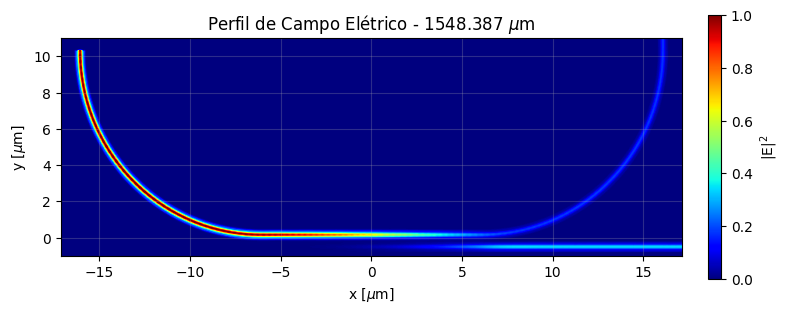

In [14]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)
im1 = ax1.imshow(np.rot90(efield[:,:,index_lambd]), cmap = 'jet', extent=[xmin, xmax, ymin, ymax], vmin=0, vmax=1)

colorbar = plt.colorbar(im1, fraction=0.02, pad=0.04)
colorbar.set_label(r'|E|$^2$')

plt.xlabel(r'x [$\mu$m]')
plt.ylabel(r'y [$\mu$m]')
plt.title(r'Perfil de Campo Elétrico - %4.3f $\mu$m'%valor_lambda)
plt.grid(which='major', alpha=0.25)

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear.png')
plt.show()


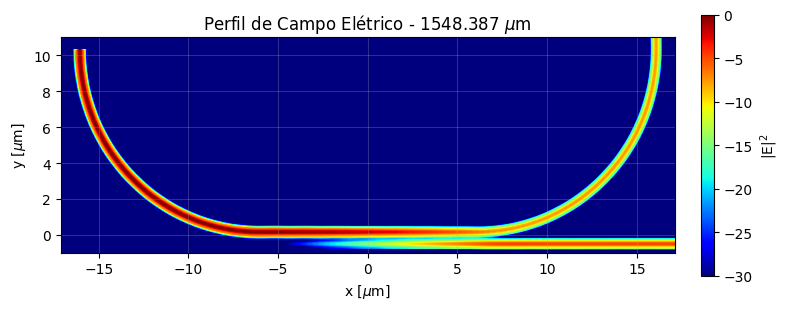

In [15]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)
im2 = ax2.imshow(10*np.log10(np.rot90(efield[:,:,index_lambd])), cmap = 'jet', extent=[xmin, xmax, ymin, ymax], vmin=-30, vmax=0)

colorbar = plt.colorbar(im2, fraction=0.02, pad=0.04)
colorbar.set_label(r'|E|$^2$')

plt.xlabel(r'x [$\mu$m]')
plt.ylabel(r'y [$\mu$m]')
plt.title(r'Perfil de Campo Elétrico - %4.3f $\mu$m'%valor_lambda)
plt.grid(which='major', alpha=0.25)

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Log.png')
plt.show()

Transmissão nas portas

In [15]:
trans_00 = fdtdApi.getresult('FDTD::ports::port_00', 'T')
trans_01 = fdtdApi.getresult('FDTD::ports::port_01', 'T')
trans_10 = fdtdApi.getresult('FDTD::ports::port_10', 'T')
trans_11 = fdtdApi.getresult('FDTD::ports::port_11', 'T')


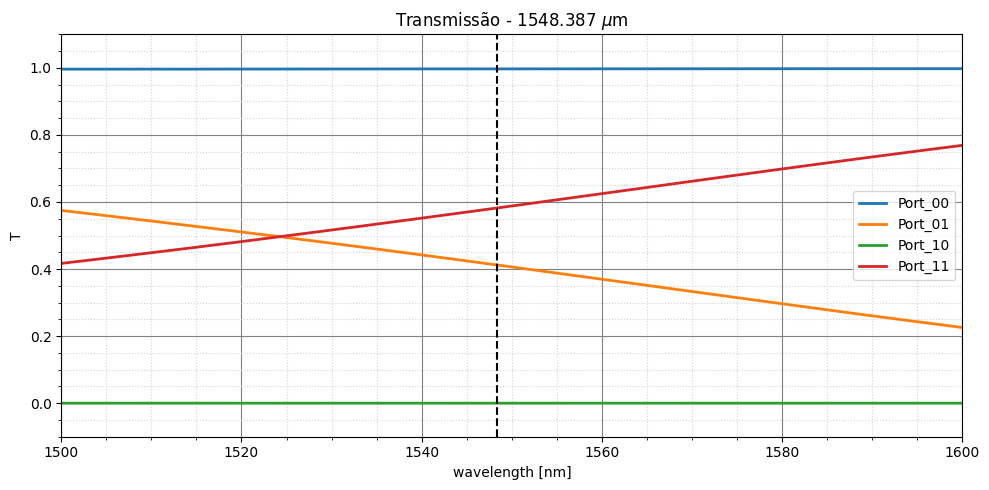

In [19]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)
plt.plot(trans_00['lambda']/nm, np.abs(trans_00['T']), label = 'Port_00', linewidth=2)
plt.plot(trans_01['lambda']/nm, np.abs(trans_01['T']), label = 'Port_01', linewidth=2)
plt.plot(trans_10['lambda']/nm, np.abs(trans_10['T']), label = 'Port_10', linewidth=2)
plt.plot(trans_11['lambda']/nm, np.abs(trans_11['T']), label = 'Port_11', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-0.1,1.1])
plt.title(r'Transmissão - %4.3f $\mu$m'%valor_lambda)
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - Linear.png')
plt.show()

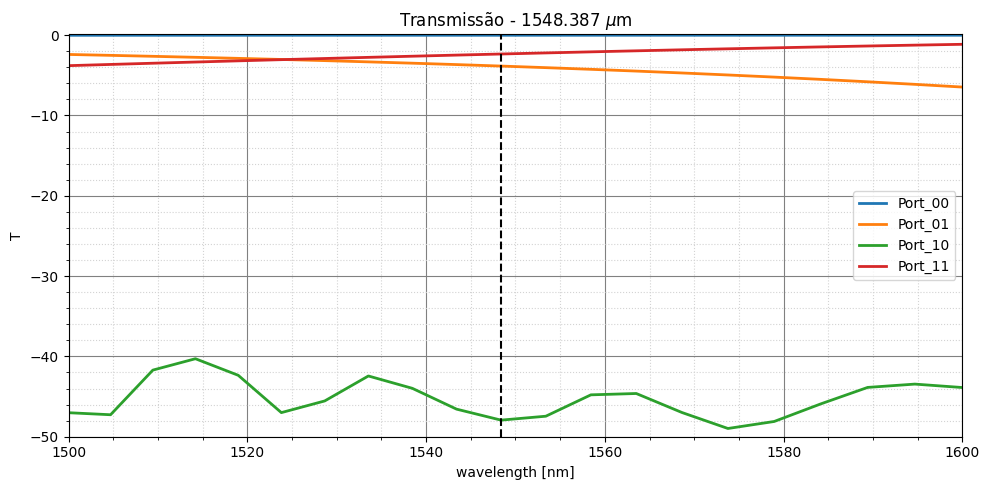

In [21]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)
plt.plot(trans_00['lambda']/nm, 10*np.log10(np.abs(trans_00['T'])), label = 'Port_00', linewidth=2)
plt.plot(trans_01['lambda']/nm, 10*np.log10(np.abs(trans_01['T'])), label = 'Port_01', linewidth=2)
plt.plot(trans_10['lambda']/nm, 10*np.log10(np.abs(trans_10['T'])), label = 'Port_10', linewidth=2)
plt.plot(trans_11['lambda']/nm, 10*np.log10(np.abs(trans_11['T'])), label = 'Port_11', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-50,5])
plt.title(r'Transmissão - %4.3f $\mu$m'%valor_lambda)
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - Log.png')
plt.show()

In [45]:
x_value = 1550


transmition_00 = interp1d(np.ravel(trans_00['lambda'])/nm, np.abs(trans_00['T']), kind='linear', fill_value='extrapolate')
transmition_01 = interp1d(np.ravel(trans_01['lambda'])/nm, np.abs(trans_01['T']), kind='linear', fill_value='extrapolate')
transmition_10 = interp1d(np.ravel(trans_10['lambda'])/nm, np.abs(trans_10['T']), kind='linear', fill_value='extrapolate')
transmition_11 = interp1d(np.ravel(trans_11['lambda'])/nm, np.abs(trans_11['T']), kind='linear', fill_value='extrapolate')

T_00 = transmition_00(x_value)
T_01 = transmition_01(x_value)
T_10 = transmition_10(x_value)
T_11 = transmition_11(x_value)

print(f'Transmissão na Port 00 para {x_value}nm: {T_00:.4f}')
print(f'Transmissão na Port 01 para {x_value}nm: {T_01:.4f}')
print(f'Transmissão na Port 10 para {x_value}nm: {T_10:.4f}')
print(f'Transmissão na Port 11 para {x_value}nm: {T_11:.4f}')

Transmissão na Port 00 para 1550nm: 0.9969
Transmissão na Port 01 para 1550nm: 0.4061
Transmissão na Port 10 para 1550nm: 0.0000
Transmissão na Port 11 para 1550nm: 0.5882


Perda de Inserção

In [46]:
P_out = 10*np.log10(T_01 + T_11)

Perda = P_out

print(f'Perda de Inserção para {x_value}nm = {Perda:.4f}dB')

Perda de Inserção para 1550nm = -0.0248dB


Oitmização do Dispositivo

In [14]:
x_span_waveguide_acopla_start = 5*um
x_span_waveguide_acopla_stop = 15*um
number_points_span = 10

x_span_waveguide_acopla_vector = np.linspace(x_span_waveguide_acopla_start, x_span_waveguide_acopla_stop, number_points_span)

trans_00_vector = np.zeros([number_points_span, num_frequency_points])
trans_01_vector = np.zeros([number_points_span, num_frequency_points])
trans_10_vector = np.zeros([number_points_span, num_frequency_points])
trans_11_vector = np.zeros([number_points_span, num_frequency_points])

In [15]:
for i in range(number_points_span):
    fdtdApi.switchtolayout()
    
    x_span_waveguide_acopla_aux = x_span_waveguide_acopla_vector[i]
    
    fdtdApi.setnamed('waveguide_topper', 'x span', x_span_waveguide_acopla_aux + radiu*2 + 5*um)
    fdtdApi.setnamed('waveguide_upper', 'x span', x_span_waveguide_acopla_aux)
    fdtdApi.setnamed('90_rct_left', 'x', -(x_span_waveguide_acopla_aux + radiu*2)/2)
    fdtdApi.setnamed('90_rct_rigth', 'x', (x_span_waveguide_acopla_aux + radiu*2)/2)
    fdtdApi.setnamed('90_bend_left', 'x', -(x_span_waveguide_acopla_aux)/2)
    fdtdApi.setnamed('90_bend_rigth', 'x', (x_span_waveguide_acopla_aux)/2)

    x_span_fdtd_aux = (x_span_waveguide_acopla_aux+2*radiu) + 2*um
    time_simulation = (np.pi*radiu+x_span_waveguide_acopla_aux)*7/c + 200e-15

    fdtdApi.setnamed('FDTD', 'x span', x_span_fdtd_aux)
    fdtdApi.setnamed('FDTD', 'simulation time', time_simulation)
    
    fdtdApi.setnamed('FDTD::ports::port_00', 'x', -(x_span_waveguide_acopla_aux + 2*radiu)/2)
    fdtdApi.setnamed('FDTD::ports::port_01', 'x', (x_span_waveguide_acopla_aux + 2*radiu)/2)
    fdtdApi.setnamed('FDTD::ports::port_10', 'x', -(x_span_waveguide_acopla_aux + 2*radiu)/2)
    fdtdApi.setnamed('FDTD::ports::port_11', 'x', (x_span_waveguide_acopla_aux + 2*radiu)/2)

    fdtdApi.setnamed('Monitor_E', 'x span', x_span_fdtd_aux)

    fdtdApi.run(3)
    
    trans_00_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_00', 'T')['T']
    trans_01_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_01', 'T')['T']
    trans_10_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_10', 'T')['T']
    trans_11_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_11', 'T')['T']
    
    

C:\Users\edilb\AppData\Local\Temp\ipykernel_25564\2316323855.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax4.plot(x_span_waveguide_acopla_vector/um, np.abs(trans_11_vector[:,j]), 'o-', label= '%5.1f nm'% (lambda_valors[j]/nm), linewidth=2)


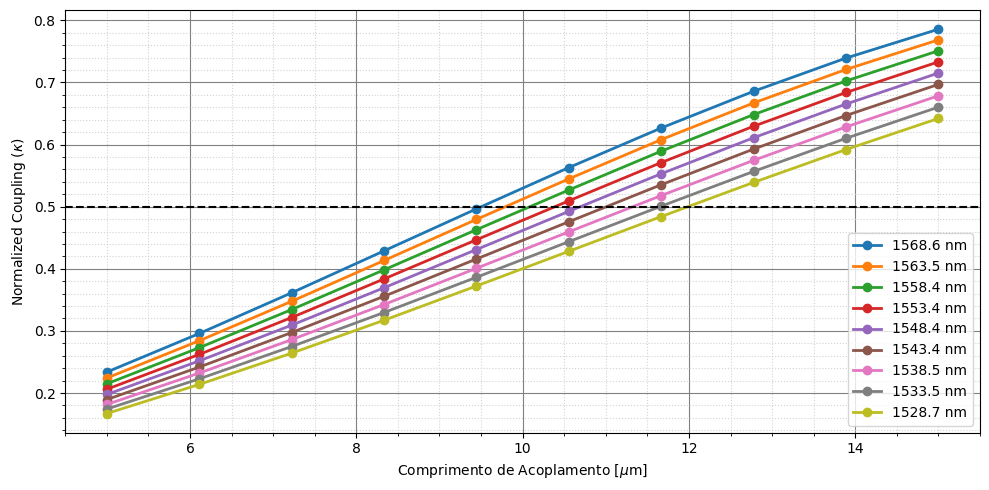

In [22]:
lambda_valors = fdtdApi.getresult('FDTD::ports::port_00', 'T')['lambda']

fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(111)
for j in range(6,15):
    ax5.plot(x_span_waveguide_acopla_vector/um, np.abs(trans_11_vector[:,j]), 'o-', label= '%5.1f nm'% (lambda_valors[j]/nm), linewidth=2)

plt.axhline(y=0.5, color='k', linestyle='--')

plt.xlabel(r'Comprimento de Acoplamento [$\mu$m]')
plt.ylabel(r'Normalized Coupling ($\kappa$)')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Comprimentos de Acoplamento para Otimização.png')
plt.show()

Guia Otimizado

In [21]:
fdtdApi.switchtolayout()
    
x_span_waveguide_acopla_otimizado = 10.53*um
    
fdtdApi.setnamed('waveguide_topper', 'x span', x_span_waveguide_acopla_otimizado + radiu*2 + 5*um)
fdtdApi.setnamed('waveguide_upper', 'x span', x_span_waveguide_acopla_otimizado)
fdtdApi.setnamed('90_rct_left', 'x', -(x_span_waveguide_acopla_otimizado + radiu*2)/2)
fdtdApi.setnamed('90_rct_rigth', 'x', (x_span_waveguide_acopla_otimizado + radiu*2)/2)
fdtdApi.setnamed('90_bend_left', 'x', -(x_span_waveguide_acopla_otimizado)/2)
fdtdApi.setnamed('90_bend_rigth', 'x', (x_span_waveguide_acopla_otimizado)/2)

x_span_fdtd_otimizado = (x_span_waveguide_acopla_otimizado+2*radiu) + 2*um
time_simulation = (np.pi*radiu+x_span_waveguide_acopla_otimizado)*7/c + 200e-15

fdtdApi.setnamed('FDTD', 'x span', x_span_fdtd_otimizado)
fdtdApi.setnamed('FDTD', 'simulation time', time_simulation)
    
fdtdApi.setnamed('FDTD::ports::port_00', 'x', -(x_span_waveguide_acopla_otimizado + 2*radiu)/2)
fdtdApi.setnamed('FDTD::ports::port_01', 'x', (x_span_waveguide_acopla_otimizado + 2*radiu)/2)
fdtdApi.setnamed('FDTD::ports::port_10', 'x', -(x_span_waveguide_acopla_otimizado + 2*radiu)/2)
fdtdApi.setnamed('FDTD::ports::port_11', 'x', (x_span_waveguide_acopla_otimizado + 2*radiu)/2)

fdtdApi.setnamed('Monitor_E', 'x span', x_span_fdtd_otimizado)

fdtdApi.run(3)
   
trans_00_otimizado = fdtdApi.getresult('FDTD::ports::port_00', 'T')
trans_01_otimizado = fdtdApi.getresult('FDTD::ports::port_01', 'T')
trans_10_otimizado = fdtdApi.getresult('FDTD::ports::port_10', 'T')
trans_11_otimizado = fdtdApi.getresult('FDTD::ports::port_11', 'T')

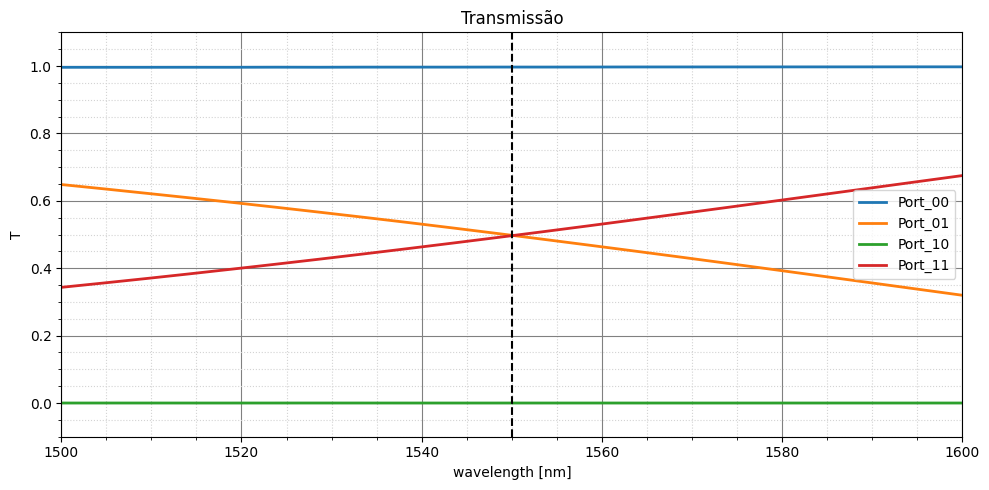

In [46]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(111)
plt.plot(trans_00_otimizado['lambda']/nm, np.abs(trans_00_otimizado['T']), label = 'Port_00', linewidth=2)
plt.plot(trans_01_otimizado['lambda']/nm, np.abs(trans_01_otimizado['T']), label = 'Port_01', linewidth=2)
plt.plot(trans_10_otimizado['lambda']/nm, np.abs(trans_10_otimizado['T']), label = 'Port_10', linewidth=2)
plt.plot(trans_11_otimizado['lambda']/nm, np.abs(trans_11_otimizado['T']), label = 'Port_11', linewidth=2)

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-0.1,1.1])
plt.title(r'Transmissão')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas otimizadas - Linear.png')
plt.show()

C:\Users\edilb\AppData\Local\Temp\ipykernel_17168\1377344132.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


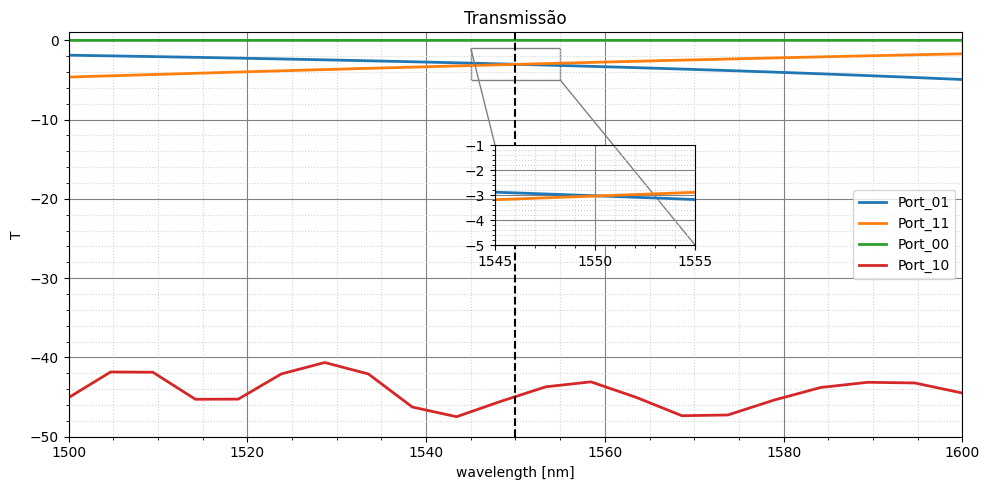

In [22]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(111)
plt.plot(trans_01_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_01_otimizado['T'])), label = 'Port_01', linewidth=2)
plt.plot(trans_11_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_11_otimizado['T'])), label = 'Port_11', linewidth=2)
plt.plot(trans_00_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_00_otimizado['T'])), label = 'Port_00', linewidth=2)
plt.plot(trans_10_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_10_otimizado['T'])), label = 'Port_10', linewidth=2)

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel('wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-50,1])
plt.title('Transmissão')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.minorticks_on()

axins = fig6.add_axes([0.5, 0.5, 0.2, 0.2])
axins.plot(trans_01_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_01_otimizado['T'])), label = 'Port_01', linewidth=2)
axins.plot(trans_11_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_11_otimizado['T'])), label = 'Port_11', linewidth=2)
axins.set_xlim(1545, 1555)
axins.set_ylim(-5, -1)
axins.grid(which='major', color='gray', linestyle='-')
axins.grid(which='minor', color='lightgray', linestyle=':')
axins.minorticks_on()
axins.yaxis.get_major_locator().set_params(nbins=4)
axins.xaxis.get_major_locator().set_params(nbins=3)
mark_inset(ax6, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('Transmissão nas portas otimizadas - Log.png')
plt.show()

C:\Users\edilb\AppData\Local\Temp\ipykernel_17168\3348688854.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


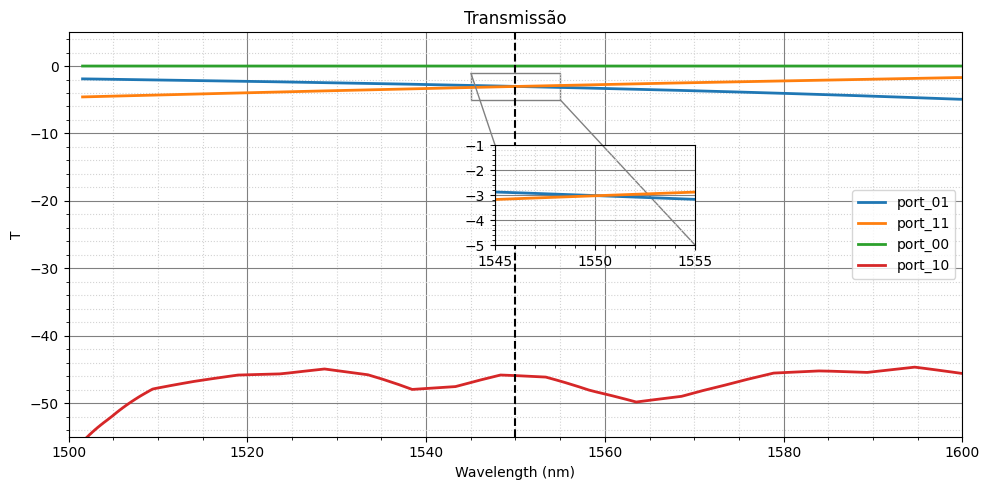

In [7]:
file_path = r"C:\Users\edilb\Documents\Engenharia Eletrica\Projeto\Adolfo\Lab_08\FDTD\TE_MODE\Data_Interconect.txt"

port_00_data = []
port_01_data = []
port_10_data = []
port_11_data = []

current_port = None

with open(file_path, 'r') as file:
    for line in file:
        if 'port_01' in line:
            current_port = 'Port_01'
            continue
        elif 'port_10' in line:
            current_port = 'Port_10'
            continue
        elif 'port_11' in line:
            current_port = 'Port_11'
            continue

        try:
            wavelength, transmission = map(float, line.strip().split(','))
            if current_port == 'Port_01':
                port_01_data.append((wavelength, transmission))
            elif current_port == 'Port_10':
                port_10_data.append((wavelength, transmission))
            elif current_port == 'Port_11':
                port_11_data.append((wavelength, transmission))
        except ValueError:
            continue

port_00_data = [(wavelength, 0) for wavelength, _ in port_01_data]

port_00 = pd.DataFrame(port_00_data, columns=['wavelength', 'transmission'])
port_01 = pd.DataFrame(port_01_data, columns=['wavelength', 'transmission'])
port_10 = pd.DataFrame(port_10_data, columns=['wavelength', 'transmission'])
port_11 = pd.DataFrame(port_11_data, columns=['wavelength', 'transmission'])

fig7 = plt.figure(figsize=(10, 5))
ax7 = fig7.add_subplot(111)
plt.plot(port_01['wavelength'], port_01['transmission'], label='port_01', linewidth=2)
plt.plot(port_11['wavelength'], port_11['transmission'], label='port_11', linewidth=2)
plt.plot(port_00['wavelength'], port_00['transmission'], label='port_00', linewidth=2)
plt.plot(port_10['wavelength'], port_10['transmission'], label='port_10', linewidth=2)

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel('Wavelength (nm)')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-55, 5])
plt.title('Transmissão')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.minorticks_on()

axins = fig7.add_axes([0.5, 0.5, 0.2, 0.2])
axins.plot(port_01['wavelength'], port_01['transmission'], linewidth=2)
axins.plot(port_11['wavelength'], port_11['transmission'], linewidth=2)
axins.set_xlim(1545, 1555)
axins.set_ylim(-5, -1)
axins.grid(which='major', color='gray', linestyle='-')
axins.grid(which='minor', color='lightgray', linestyle=':')
axins.minorticks_on()
axins.yaxis.get_major_locator().set_params(nbins=4)
axins.xaxis.get_major_locator().set_params(nbins=3)

mark_inset(ax7, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig('Transmissão nas portas otimizadas - INTERCONECT.png')
plt.show()
